## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 或其他支援中文的字型名稱
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

In [8]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
#將模型工具指派給一變數做使用
#注意轉換x得格式1D->2D
#將x,y資料導入LinearRegression演算法做訓練
#列印出訓練完成之函數的斜率與截距

訓練出的斜率 w = 1.6170185212611563
訓練出的截距 b = 0.27312968949421723


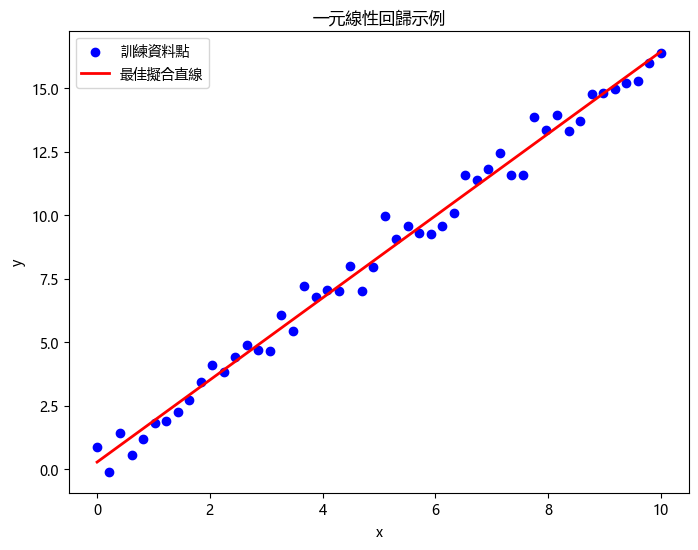

In [11]:

# (1) X 必須為 2D 數組才能餵進 LinearRegression，故 reshape 一下
X = x.reshape(-1, 1)  # 從 shape (50,) -> (50,1)

# (2) 建立 LinearRegression 模型並訓練
model = LinearRegression()
model.fit(X, y)

# (3) 取得訓練後的斜率 (coef_) 與截距 (intercept_)
w = model.coef_[0]       # 一元線性回歸只有一個係數
b = model.intercept_

print(f"訓練出的斜率 w = {w}")
print(f"訓練出的截距 b = {b}")

# (4) 使用模型預測 y_hat，方便後續繪圖比較
y_pred = model.predict(X)

# (5) 視覺化比較原始資料點 (x, y) 與預測直線 (x, y_pred)
plt.figure(figsize=(8,6))
plt.scatter(x, y, label="訓練資料點", color="blue")
plt.plot(x, y_pred, label="最佳擬合直線", color="red", linewidth=2)
plt.title("一元線性回歸示例")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1. 匯入 LinearRegression 與 train_test_split 等工具
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])


In [13]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
#匯入在sklearn.model_selection套件裡面的train_test_split模組
#切割數據集(訓練資料80%、測試資料20%，設定random_state=20)
#畫出訓練資料集的matplotlib圖形m

訓練得到的斜率 w = 1.6066
訓練得到的截距 b = 0.3680
測試集的 MSE = 0.4134


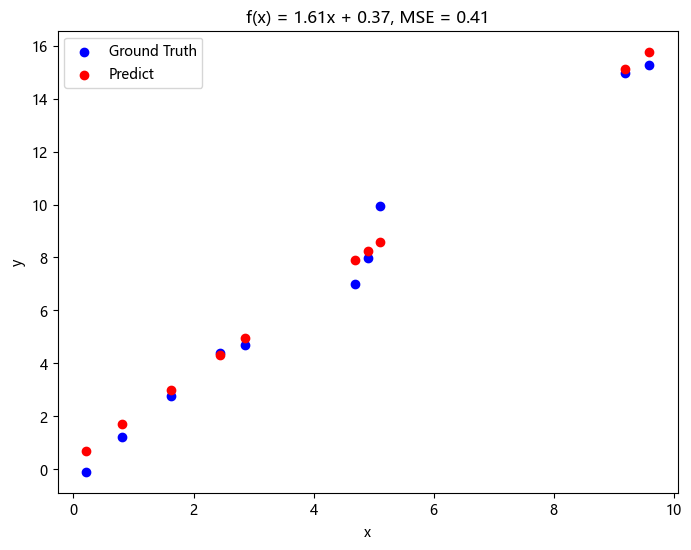

In [14]:
# 注意：LinearRegression 需要 (樣本數, 特徵數) 的 2D 結構，所以要將 x reshape 一下
X = x.reshape(-1, 1)

# 3. 切割資料集 (訓練集 80%、測試集 20%，並設定 random_state=20 以利結果重現)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

# 4. 建立線性回歸模型並訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 取得模型學到的參數 (斜率 w 和 截距 b)
w = model.coef_[0]
b = model.intercept_
print(f"訓練得到的斜率 w = {w:.4f}")
print(f"訓練得到的截距 b = {b:.4f}")

# 6. 使用訓練出的模型預測測試集的 y 值
y_pred = model.predict(X_test)

# 7. 計算測試集的 MSE
mse = mean_squared_error(y_test, y_pred)
print(f"測試集的 MSE = {mse:.4f}")

# 8. 將真實值與預測值做可視化對比
plt.figure(figsize=(8,6))

# (a) 藍色點：測試集的真實 (x, y_test)
plt.scatter(X_test, y_test, color="blue", label="Ground Truth")

# (b) 紅色點：模型預測 (x, y_pred)
plt.scatter(X_test, y_pred, color="red", label="Predict")

# (c) 顯示結果之擬合函數、MSE
plt.title(f"f(x) = {w:.2f}x + {b:.2f}, MSE = {mse:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

2. 並計算出測試階段的MSE

3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)